# Introduction

Aim : Find best model by use supervised ML

We have 7 target :
1. Mammal
1. Bird
1. Reptile
1. Fish
1. Amphibian
1. Bug
1. Invertebrate

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
plt.style.use("ggplot")#plot style

In [ ]:
zoo = pd.read_csv("../input/zoo.csv")#read data
zoo.head()

In [ ]:
zoo.info()

Let's see how many of each target in our data.

In [ ]:
print(zoo.class_type.value_counts())
plt.figure(figsize = (10,8))
sns.countplot(zoo.class_type)
plt.show()

ML algorithms use math so we do not need string variables(animal names)

In [ ]:
data = zoo.copy()
data.drop("animal_name",axis = 1,inplace = True)

In [ ]:
x = data.drop("class_type",axis = 1)# input data
y = data.class_type.values# target data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

# Classification Methods
* Generally,methods in sklearn use same function:
* fit : fittin data ,actually this all you need to do after that data is ready to predict
* classification_method.fit(x,y)
* predict : predict targets
* classification_method.predict(x)
* score : this is achivment rate our model.This is closes to 1,the better
* classification_method.score(x,y)

# Confusion Matrix
* it will help to understand our model how good
* it show us true and false predicts
* it is easy with sklearn
* confusion_matrix(y_true,y_predict)

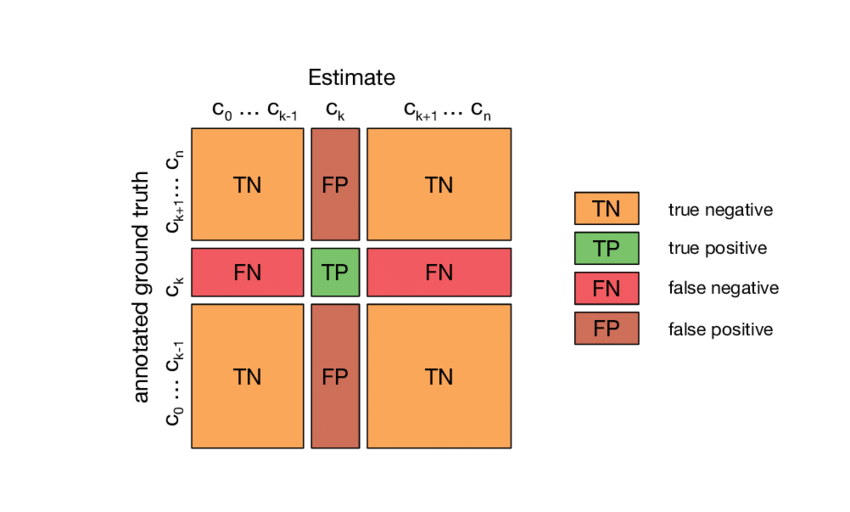

# Classification Report
* precision : What proportion of positive identifications was actually correct?
* precision = TP/(TP+FP)
* recall : What proportion of actual positives was identified correctly?
* recall = TP/(TP+FN)
* f1_score = 2*(precision*recall)/(precision+recall)
* support : number of acctual target

# SVM Classification

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 42,kernel = "linear")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print("Train Accurary : ",svm.score(x_train,y_train))
print("Test Accuray : ",svm.score(x_test,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Blues",xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

* target 3 and 7 have false prediction
* Altough accurary score is 0.93,target 3 has no correct prediction and target 7 has one false prediction

# KNN Classification

* KNN classification take k value.
* We can find best k value by use for loop.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1,x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    knn_test_scr = knn.score(x_test,y_test)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(x_train,y_train)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,x_train.shape[0]+1),knn_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_knn,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

* target 3 and 7 have false prediction
* We can see KNN is better than SVM

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(x_train,y_train)
y_pred_tree = dec_tree.predict(x_test)
print("Test Accurary : ",dec_tree.score(x_test,y_test))
print("Train Accurary : ",dec_tree.score(x_train,y_train))

In [ ]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
cr_tree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_tree)
print("classification report : \n",cr_tree)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_tree,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Greens")
plt.show()

* target 3 and 6 have false prediction
* Decison Tree and KNN have same accurary score
* but their prediction is not same

# Random Forest Classification

* RFC take n estimators like KNN
* So we can do same thing we do in KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,x_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(x_train,y_train)
    test_score = rf.score(x_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(x_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,x_train.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Greens")
plt.show()

* target 3 and 7 have false prediction
* RF ,KNN and Desicion Tree have same accurary score
* but their prediction is different

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_lr = log_reg.predict(x_test)
print("Test Accurary : ",log_reg.score(x_test,y_test))
print("Train Accurary : ",log_reg.score(x_train,y_train))

In [ ]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
cr_lr = classification_report(y_test,y_pred_lr)
print("confusion matrix : \n",cm_lr)
print("classification report : \n",cr_lr)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_lr,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Reds")
plt.show()

* target 3 and 7 have false prediction
* total false prediction is 3
* Logistic Regression is not good according to others

# Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print("Test Accurary : ",nb.score(x_test,y_test))
print("Train Accurary : ",nb.score(x_train,y_train))

In [ ]:
cm_nb = confusion_matrix(y_test,y_pred_nb)
cr_nb = classification_report(y_test,y_pred_nb)
print("confusion matrix : \n",cm_nb)
print("classification report : \n",cr_nb)

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_nb,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Reds")
plt.show()

* target 3 and 7 have false prediction
* Naive Bayes accurary score is same other classification
* But again,it has different prediction

# Conclusion
* All classification methods usually have false prediction to target 3
* I think because of this target 3 number of sample is little according to others
* We see that Naive Bayes,KNN,Random Forest and Decision Tree give similar and best results
* I think we can choose one of them.